In [279]:
#import bibliotecas

import cv2
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance


In [262]:
def thresh(image,blur,tamanho_images):    
    image = cv2.resize(image, dsize=(tamanho_images, tamanho_images), interpolation=cv2.INTER_CUBIC)
    ksize = (blur, blur)
    image = cv2.blur(image, ksize) 

#    print(image[24])    
#    cv2.imshow("Final 1", image)
#    cv2.waitKey(0)

    ret,thresh1 = cv2.threshold(image,240,255,cv2.THRESH_BINARY)
    
    return thresh1

In [263]:
def area_imagem(image,blur,tamanho_images):

    thresh1 = thresh(image,blur,tamanho_images)

    area = np.sum(thresh1 == 255)
    
    return area

In [264]:
def borda(image,blur,tamanho_images):

    image = cv2.resize(image, dsize=(tamanho_images, tamanho_images), interpolation=cv2.INTER_CUBIC)
    ksize = (blur, blur)
    image = cv2.blur(image, ksize) 
    
    edges = cv.Canny(image,25,100)
    perimetro = np.sum(edges == 255)
    
    return perimetro

In [265]:
def maior_linha(image,blur,tamanho_images):
    thresh1 = thresh(image,blur,tamanho_images)
    
    valor=0
    for i in range(tamanho_images):
        linha = thresh1[i]
        tamanho = np.sum(linha == 0)
        if tamanho>valor:
            maior_linha=i
            valor=tamanho
    
    return valor


In [266]:
def maior_coluna(image,blur,tamanho_images):
    thresh1 = thresh(image,blur,tamanho_images)
    thresh1 = thresh1.transpose()
#    cv2.imshow("Final 1", thresh1)
#    cv2.waitKey(0)
    valor=0
    for i in range(tamanho_images):
        linha = thresh1[i]
        tamanho = np.sum(linha == 0)
        if tamanho>valor:
            maior_linha=i
            valor=tamanho
    
    return valor


In [781]:
def cor(imagem,blur,tamanho_images):
    image = cv2.resize(imagem, dsize=(tamanho_images, tamanho_images), interpolation=cv2.INTER_CUBIC)
    ksize = (blur, blur)
    image = cv2.blur(image, ksize) 
#    plt.imshow(image)

    cores=[]
    todas_cores=[]

    qtd=0

    i=16
    while i<=24:
        j=16
        while j<=24:
            cor = str(image[i][j])
            todas_cores.append(str(image[i][j]))
            if cor not in cores:
                cores.append(str(cor))
            j = j +1
        i = i +1

    valor=0
    for i in range(len(cores)):
        repeticoes = todas_cores.count(cores[i])
        if repeticoes>valor:
            valor = repeticoes
            cor = cores[i]

    cor = cor.replace(']','')
    cor = cor.replace('[','')
    cor_list = cor.split()

    compara = [int(cor_list[0]),int(cor_list[1]),int(cor_list[2])]

    return compara

#imagem = cv2.imread('Sofa/3.jpg')
#cor(imagem,blur,tamanho_images)

[86, 175, 212]

In [803]:
#Carregar base 
sofas=[]
tamanhos=[]
imagens = []
blur=2
tamanho_images = 48
num_images=1501

for i in range(num_images):
    
    nome = "Sofa/" + str(i+1) + ".jpg"
    imagem = cv2.imread(nome,0)
    imagens.append(imagem)
    
    largura = maior_linha(imagem,blur,tamanho_images)
    altura = maior_coluna(imagem,blur,tamanho_images)    
    area=area_imagem(imagem,blur,tamanho_images)
    perimetro=borda(imagem,blur,tamanho_images)

    tipo = round((perimetro/area)*1000)
    razao = round(largura/altura)
        
    sofas.append([largura,altura,area,perimetro])
    
    tamanhos.append(i+1)
    
    #if razao==1:
    #    tamanhos.append(1)
    #elif razao==2:
    #    tamanhos.append(2)
    #else:
    #    tamanhos.append(3)        

In [804]:
#arvore de decisão
'''
clf = tree.DecisionTreeClassifier()
clf = clf.fit(sofas,tamanhos)
'''

'\nclf = tree.DecisionTreeClassifier()\nclf = clf.fit(sofas,tamanhos)\n'

In [805]:
'''
imagem = cv2.imread("Sofa/116.jpg",0)

largura = maior_linha(imagem,blur,tamanho_images)
altura = maior_coluna(imagem,blur,tamanho_images)    
perimetro=borda(imagem,blur,tamanho_images)
area=area_imagem(imagem,blur,tamanho_images)

resultadoUser = clf.predict([[largura,altura,area,perimetro]])

print(resultadoUser)
'''

'\nimagem = cv2.imread("Sofa/116.jpg",0)\n\nlargura = maior_linha(imagem,blur,tamanho_images)\naltura = maior_coluna(imagem,blur,tamanho_images)    \nperimetro=borda(imagem,blur,tamanho_images)\narea=area_imagem(imagem,blur,tamanho_images)\n\nresultadoUser = clf.predict([[largura,altura,area,perimetro]])\n\nprint(resultadoUser)\n'

In [861]:
def semelhantes(number_imagem,nivel_semelhanca):
    imagem = imagens[number_imagem-1]
    plt.subplot(122),plt.imshow(imagem,cmap = 'gray')
    plt.title('Original Image: '+str(number_imagem)), plt.xticks([]), plt.yticks([])
    plt.show()

    largura = maior_linha(imagem,blur,tamanho_images)
    altura = maior_coluna(imagem,blur,tamanho_images)    
    perimetro=borda(imagem,blur,tamanho_images)
    area=area_imagem(imagem,blur,tamanho_images)

    sofazinho = [largura,altura,area,perimetro]

    distancias1 = []
    distancias2 = []
    for i in range(len(sofas)):
        sofa = sofas[i]
        dst = distance.euclidean(sofa, sofazinho)
        distancias1.append(round(dst))

    distancias1.sort()
    dict_aux = list(set(distancias1))
#    dict_aux = distancias1
    #print(dict_aux)

    semelhantes=0
    for i in range(len(sofas)):
        sofa = sofas[i]
        dst = distance.euclidean(sofa, sofazinho)
        if dst<=dict_aux[nivel_semelhanca-1] and (i+1)!=number_imagem:
            semelhantes+=1
            plt.subplot(122),plt.imshow(imagens[i],cmap = 'gray')
            plt.title(i+1), plt.xticks([]), plt.yticks([])
            plt.show()
            
#    print(dict_aux)

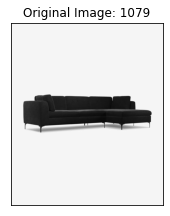

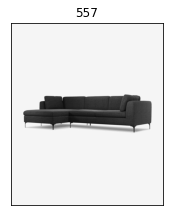

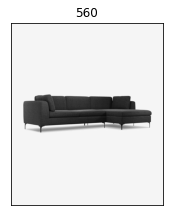

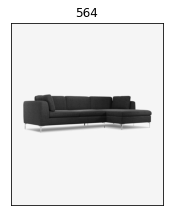

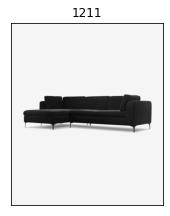

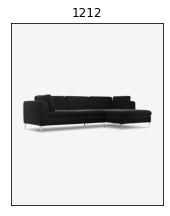

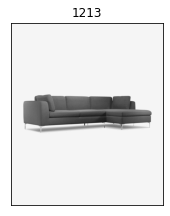

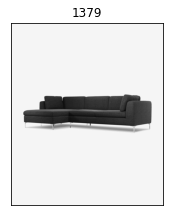

In [864]:
#numero do sofa que deseja semalhantes
numero_da_imagem = 1079
#nivel de semelhança com os demais sofás que deseja exibir
nivel = 5

semelhantes(numero_da_imagem,nivel)